[*********************100%%**********************]  1 of 1 completed


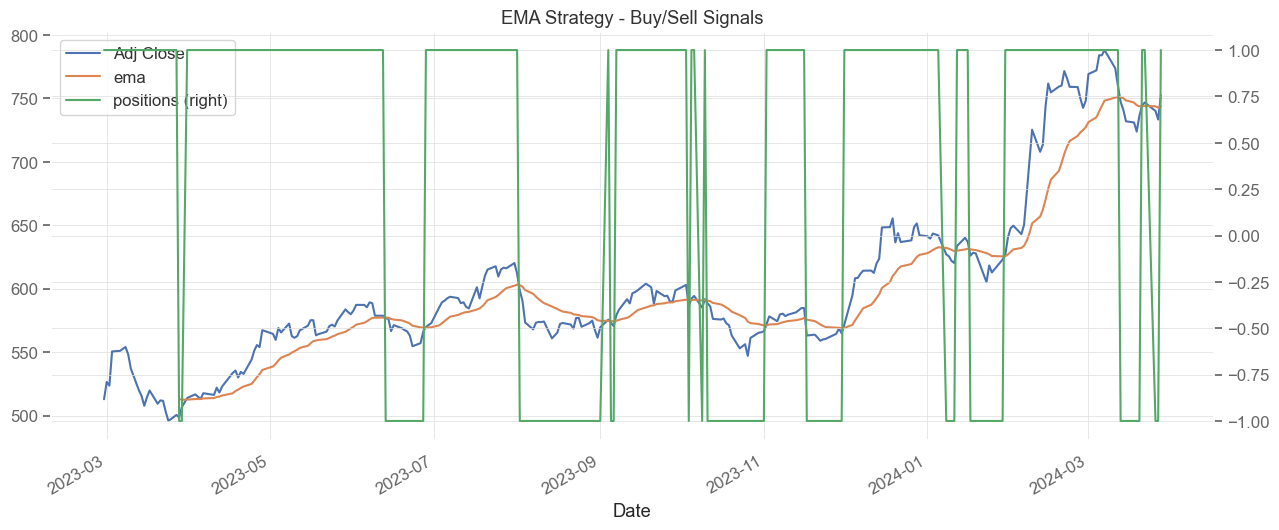

                           Strategy
-------------------------  ----------
Start Period               2023-03-01
End Period                 2024-03-28
Risk-Free Rate             0.0%
Time in Market             100.0%

Cumulative Return          36.85%
CAGR﹪                     22.28%

Sharpe                     1.52
Prob. Sharpe Ratio         94.29%
Smart Sharpe               1.45
Sortino                    2.42
Smart Sortino              2.32
Sortino/√2                 1.71
Smart Sortino/√2           1.64
Omega                      1.29

Max Drawdown               -13.02%
Longest DD Days            106
Volatility (ann.)          21.21%
Calmar                     1.71
Skew                       0.39
Kurtosis                   1.16

Expected Daily %           0.12%
Expected Monthly %         2.44%
Expected Yearly %          16.98%
Kelly Criterion            12.3%
Risk of Ruin               0.0%
Daily Value-at-Risk        -2.07%
Expected Shortfall (cVaR)  -2.07%

Max Consecutive Wins     

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2023-03-09,2023-04-05,2023-06-22,106,-13.017405,-12.889017
2,2023-10-27,2023-12-01,2023-12-12,47,-7.466936,-6.945049
3,2024-03-11,2024-03-28,2024-03-28,18,-7.010398,-5.429282
4,2023-12-20,2024-01-18,2024-02-06,49,-6.956481,-6.874999
5,2023-09-20,2023-10-11,2023-10-25,36,-6.732488,-6.367171


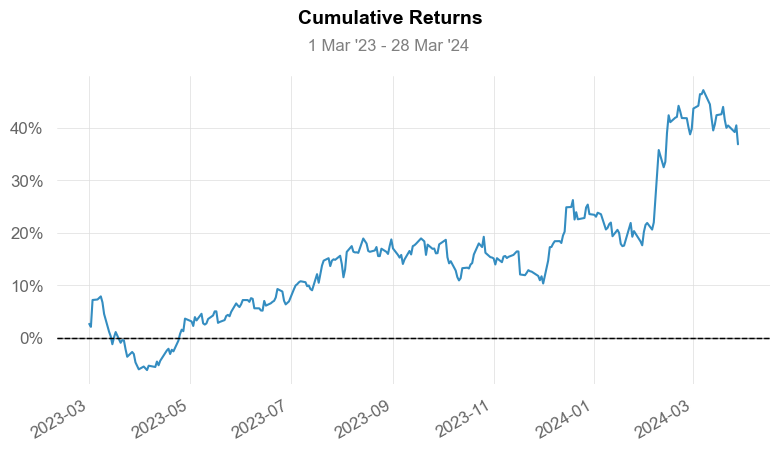

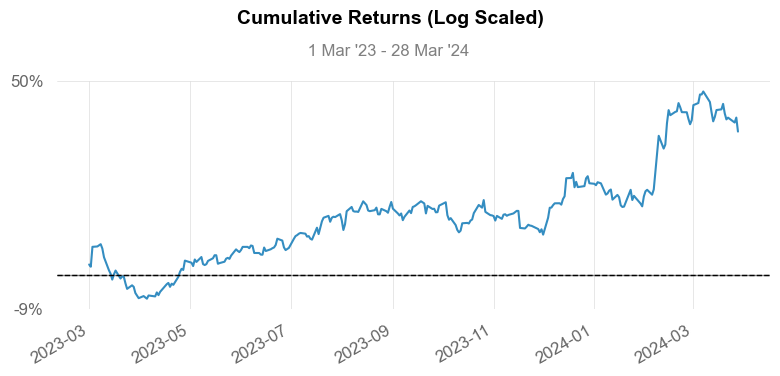

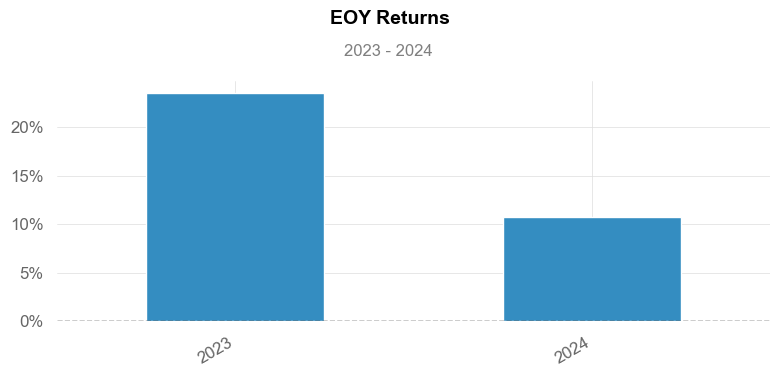

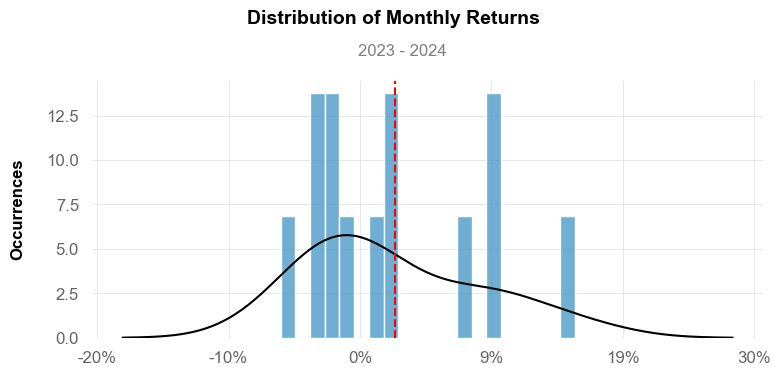

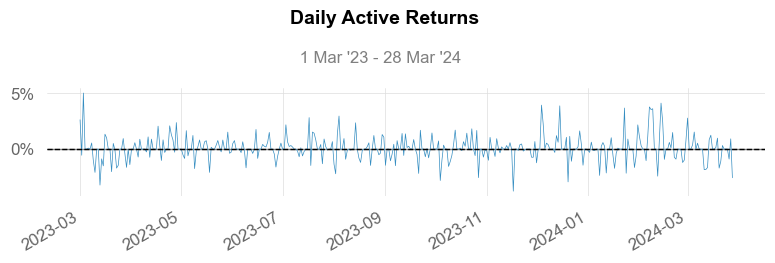

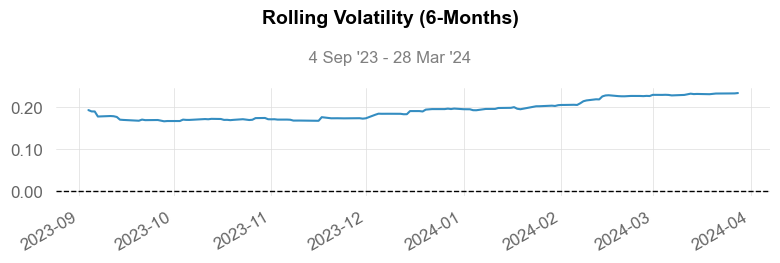

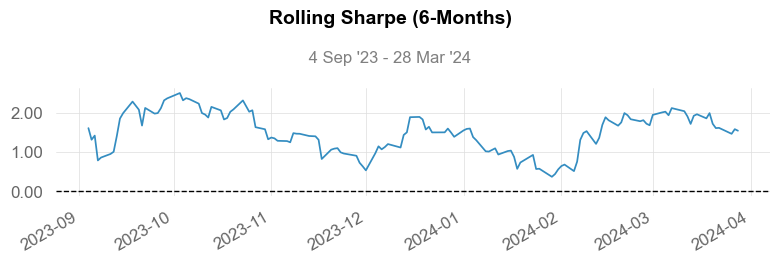

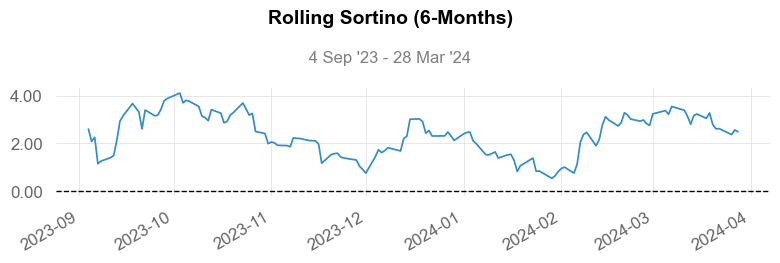

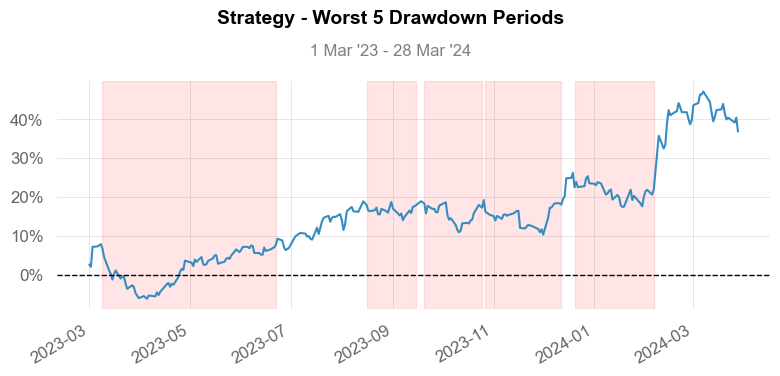

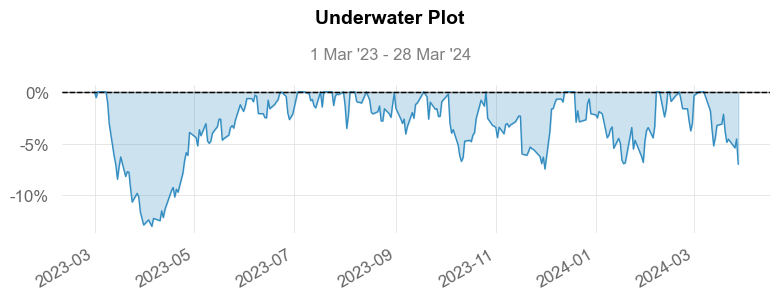

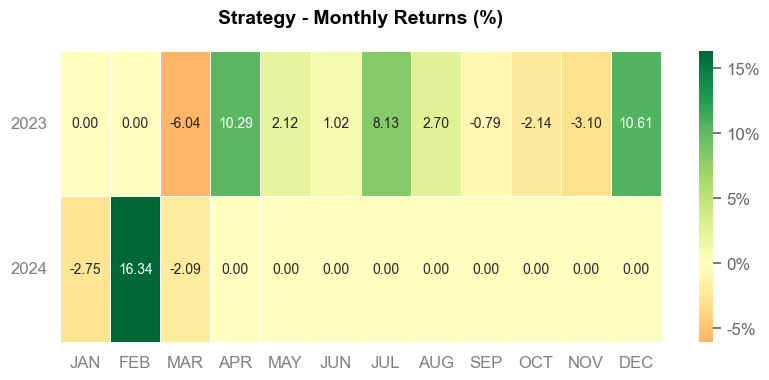

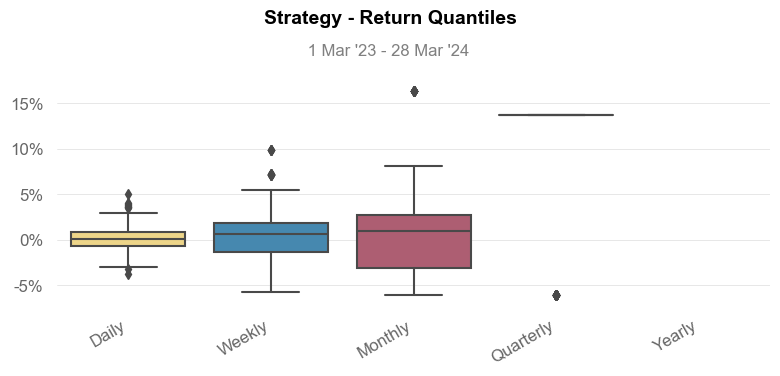

Profit on initial investment: $ 4011.5977736803798


In [4]:
import yfinance as yf
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import quantstats as qs

class BacktestingEMA:
    def __init__(self, ticker, start_date, end_date):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.ema_period = 20

        # Call other methods
        self.fetch_data()
        self.indicators()
        self.signals()
        self.positions()
        self.returns()
        self.analysis()

    def fetch_data(self):
        self.df = yf.download(self.ticker, self.start_date, self.end_date)

    def indicators(self):
        self.df['ema'] = self.df['Adj Close'].ewm(span=self.ema_period, min_periods=self.ema_period).mean()

    def signals(self):
        self.df['signal'] = np.where(self.df['Adj Close'] < self.df['ema'], -1, 1)

    def positions(self):
        self.df['positions'] = self.df['signal'].replace(to_replace=0, method='ffill')

    def returns(self):
        self.df['bnh_returns'] = np.log(self.df['Adj Close'] / self.df['Adj Close'].shift(1))
        self.df['strategy_returns'] = self.df['bnh_returns'] * self.df['positions'].shift(1)
        self.df['investment'] = 10000 * self.df['strategy_returns'].cumsum().apply(np.exp)
        self.profit = self.df['investment'][-1] - 10000
        return self.profit

    def analysis(self):
        # Plot to check the strategy working as planned
        self.df[['Adj Close', 'ema', 'positions']].plot(figsize=(15, 6), secondary_y='positions', grid=True)
        plt.title("EMA Strategy - Buy/Sell Signals")
        plt.show()

        # Generate report using quantstats
        qs.reports.full(self.df['strategy_returns'])

# Create start and end date
start_date = dt.datetime(2023, 2, 28).date()
end_date = start_date + pd.Timedelta(days=3 * 252)

# Instantiate and run the backtesting
ema_backtesting = BacktestingEMA('SBIN.NS', start_date, end_date)

# Print the profit made on the initial investment
print("Profit on initial investment: $", ema_backtesting.profit)
